# 第6章 学習に関するテクニック
## 6.1 パラメータの更新
### 6.1.2 SGD

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.4 Momentum

In [2]:
import numpy as np

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### 6.1.5 AdaGrad

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.1.7 どの更新手法を用いるか？

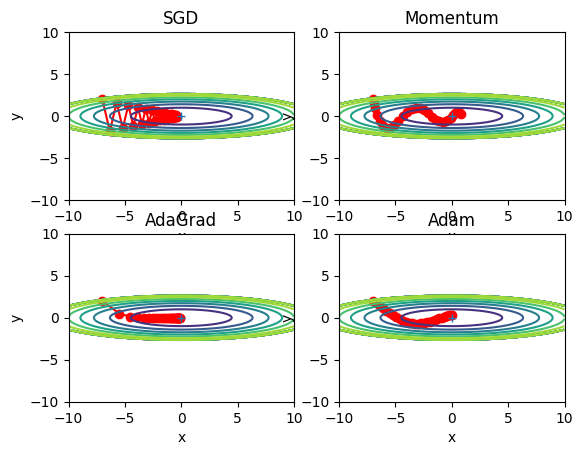

In [4]:
%run optimizer_compare_naive.py

### 6.1.8 MNISTデータセットによる更新手法の比較

==========iteration:0==========
SGD:2.431089692752275
Momentum:2.42574989506769
AdaGrad:2.122650550724428
Adam:2.20907923414879
==========iteration:100==========
SGD:1.574621263487204
Momentum:0.45369684068245336
AdaGrad:0.22745438703843407
Adam:0.2994670860201746
==========iteration:200==========
SGD:0.6549050854190831
Momentum:0.26239619762447397
AdaGrad:0.11932889764980406
Adam:0.18202170771141524
==========iteration:300==========
SGD:0.5209267901810102
Momentum:0.19031859444443608
AdaGrad:0.0786565760749195
Adam:0.14493757767565452
==========iteration:400==========
SGD:0.3343575029391199
Momentum:0.1253933156310496
AdaGrad:0.05332420328283731
Adam:0.0663324227634348
==========iteration:500==========
SGD:0.2795189555125
Momentum:0.07018876554138886
AdaGrad:0.02313552134895502
Adam:0.037089670691839376
==========iteration:600==========
SGD:0.3321498803530028
Momentum:0.11914814433604459
AdaGrad:0.07319190895187233
Adam:0.14572782684442717
==========iteration:700==========
SGD:0.36622

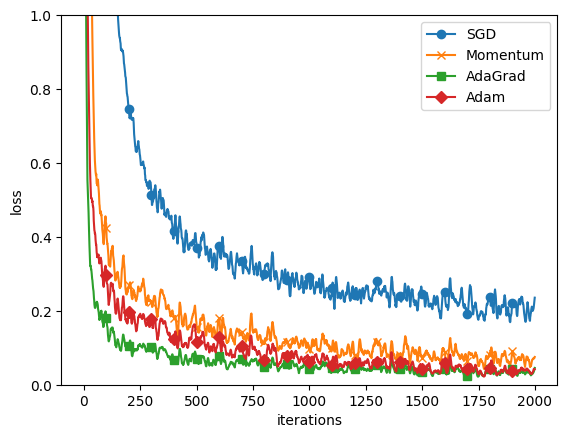

In [8]:
%run optimizer_compare_mnist.py

## 6.2 重みの初期値
### 6.2.2 隠れ層のアクティベーション分布

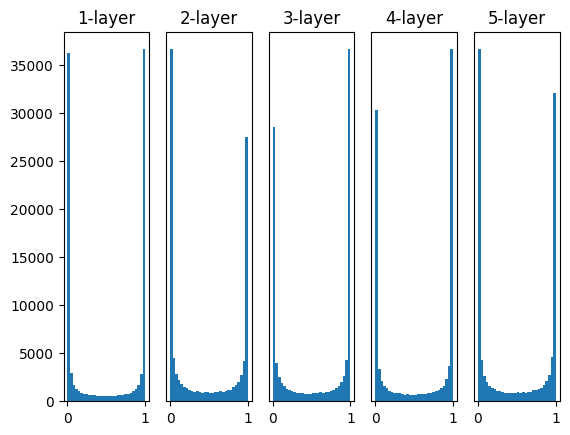

In [5]:
%run weight_init_activation_histogram.py

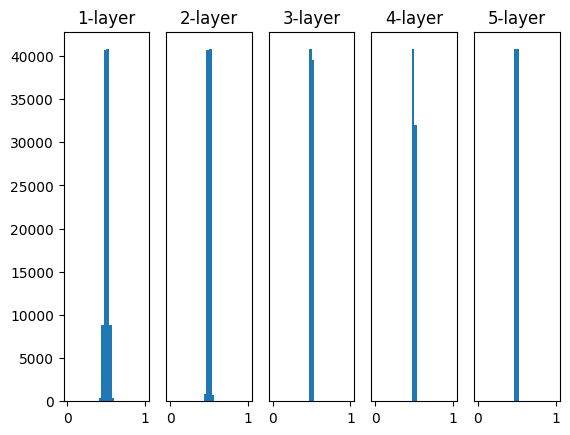

In [6]:
%run weight_init_activation_histogram.py

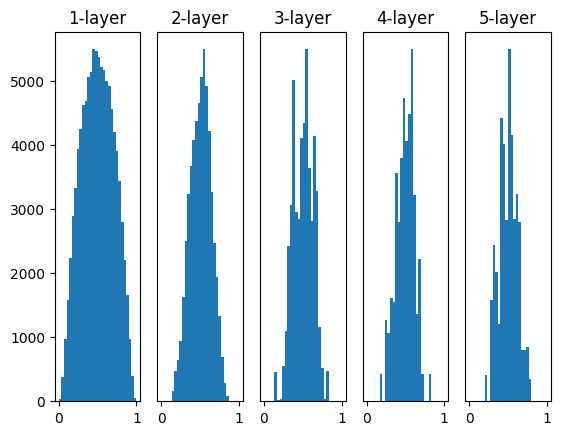

In [7]:
%run weight_init_activation_histogram.py

### 6.2.3 ReLUの場合の重みの初期値

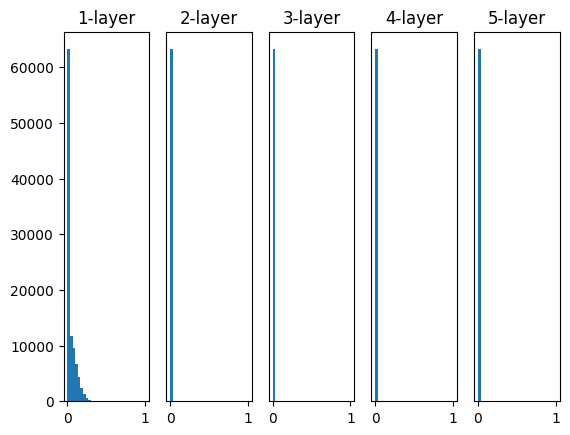

In [8]:
%run weight_init_activation_histogram.py

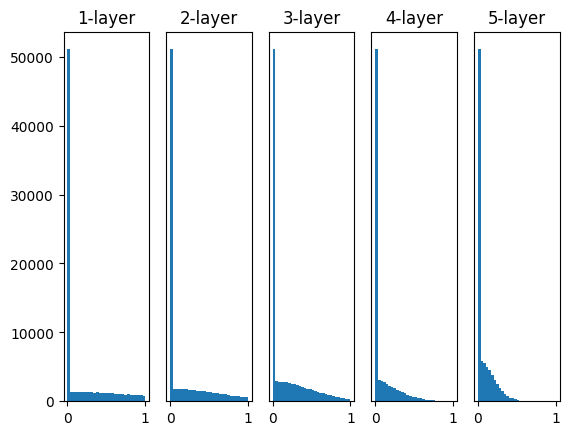

In [9]:
%run weight_init_activation_histogram.py

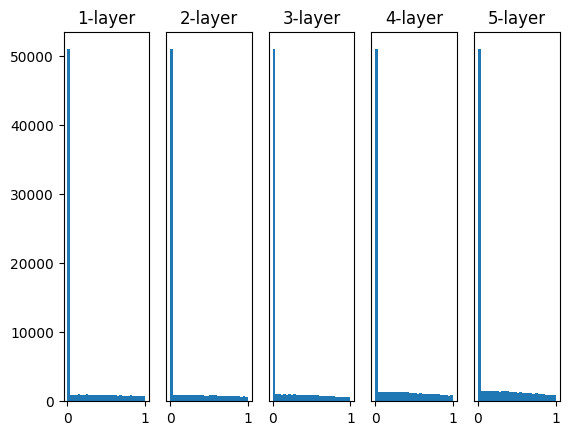

In [10]:
%run weight_init_activation_histogram.py

### 6.2.4 MNISTデータセットによる重み初期値の比較

===========iteration:0===========
std=0.01:2.302555813842738
Xavier:2.3113301371567525
He:2.3267014529082024
===========iteration:100===========
std=0.01:2.3014123488093605
Xavier:2.264186364765378
He:1.4595383659953505
===========iteration:200===========
std=0.01:2.3030024375495186
Xavier:2.1814111602788633
He:0.866095041051355
===========iteration:300===========
std=0.01:2.302301977776516
Xavier:1.9396635132569588
He:0.5643474676864864
===========iteration:400===========
std=0.01:2.299675105882021
Xavier:1.351196695158355
He:0.36320379968982636
===========iteration:500===========
std=0.01:2.3010270568931306
Xavier:0.9194782805061184
He:0.31443860476814883
===========iteration:600===========
std=0.01:2.2982774539612914
Xavier:0.6884700547734512
He:0.3572325164637553
===========iteration:700===========
std=0.01:2.3053148120118463
Xavier:0.6287638706966681
He:0.2951331107729653
===========iteration:800===========
std=0.01:2.300601705951885
Xavier:0.54254513013979
He:0.2905366764177486
=

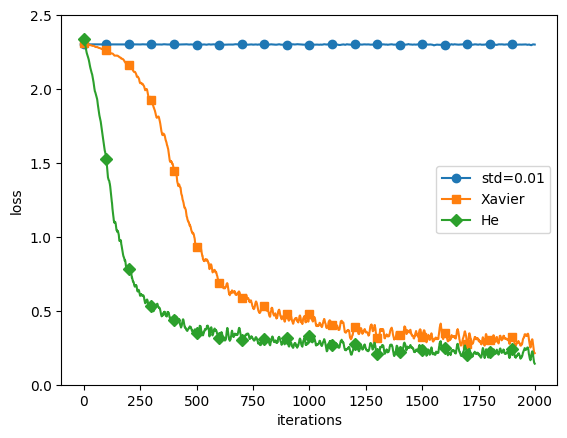

In [12]:
%run weight_init_compare.py

## 6.3 Batch Normalization
### 6.3.2 Batch Normalizationの評価

============== 1/16 ==============
epoch:0 | 0.117 - 0.072


/home/ginta/py_workspace/DeepLearningFromZero/01_theorem/ch06/../common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:1 | 0.097 - 0.12
epoch:2 | 0.097 - 0.165
epoch:3 | 0.097 - 0.182
epoch:4 | 0.097 - 0.207
epoch:5 | 0.097 - 0.224
epoch:6 | 0.097 - 0.241
epoch:7 | 0.097 - 0.256
epoch:8 | 0.097 - 0.267
epoch:9 | 0.097 - 0.287
epoch:10 | 0.097 - 0.298
epoch:11 | 0.097 - 0.315
epoch:12 | 0.097 - 0.335
epoch:13 | 0.097 - 0.359
epoch:14 | 0.097 - 0.359
epoch:15 | 0.097 - 0.376
epoch:16 | 0.097 - 0.381
epoch:17 | 0.097 - 0.391


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.097 - 0.408
epoch:19 | 0.097 - 0.419
============== 2/16 ==============
epoch:0 | 0.099 - 0.103
epoch:1 | 0.097 - 0.11
epoch:2 | 0.097 - 0.136
epoch:3 | 0.097 - 0.164
epoch:4 | 0.097 - 0.188
epoch:5 | 0.097 - 0.21
epoch:6 | 0.097 - 0.233
epoch:7 | 0.097 - 0.266
epoch:8 | 0.097 - 0.291
epoch:9 | 0.097 - 0.316
epoch:10 | 0.097 - 0.329
epoch:11 | 0.097 - 0.355
epoch:12 | 0.097 - 0.377
epoch:13 | 0.097 - 0.388
epoch:14 | 0.097 - 0.405
epoch:15 | 0.097 - 0.43
epoch:16 | 0.097 - 0.441
epoch:17 | 0.097 - 0.451
epoch:18 | 0.097 - 0.463


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.486
============== 3/16 ==============
epoch:0 | 0.117 - 0.09
epoch:1 | 0.332 - 0.09
epoch:2 | 0.487 - 0.122
epoch:3 | 0.585 - 0.197
epoch:4 | 0.652 - 0.233
epoch:5 | 0.701 - 0.272
epoch:6 | 0.763 - 0.301
epoch:7 | 0.806 - 0.331
epoch:8 | 0.85 - 0.362
epoch:9 | 0.882 - 0.402
epoch:10 | 0.914 - 0.438
epoch:11 | 0.926 - 0.465
epoch:12 | 0.938 - 0.497
epoch:13 | 0.95 - 0.521
epoch:14 | 0.96 - 0.554
epoch:15 | 0.966 - 0.573
epoch:16 | 0.968 - 0.586
epoch:17 | 0.975 - 0.611


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.979 - 0.624
epoch:19 | 0.98 - 0.648
============== 4/16 ==============
epoch:0 | 0.144 - 0.102
epoch:1 | 0.28 - 0.106
epoch:2 | 0.403 - 0.204
epoch:3 | 0.506 - 0.276
epoch:4 | 0.566 - 0.338
epoch:5 | 0.614 - 0.393
epoch:6 | 0.65 - 0.448
epoch:7 | 0.674 - 0.508
epoch:8 | 0.688 - 0.538
epoch:9 | 0.708 - 0.589
epoch:10 | 0.722 - 0.627
epoch:11 | 0.748 - 0.664
epoch:12 | 0.754 - 0.687
epoch:13 | 0.783 - 0.718
epoch:14 | 0.79 - 0.729
epoch:15 | 0.803 - 0.75
epoch:16 | 0.814 - 0.769
epoch:17 | 0.817 - 0.778


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.831 - 0.803
epoch:19 | 0.843 - 0.81
============== 5/16 ==============
epoch:0 | 0.115 - 0.076
epoch:1 | 0.115 - 0.144
epoch:2 | 0.115 - 0.288
epoch:3 | 0.118 - 0.449
epoch:4 | 0.12 - 0.552
epoch:5 | 0.118 - 0.615
epoch:6 | 0.121 - 0.673
epoch:7 | 0.121 - 0.714
epoch:8 | 0.122 - 0.744
epoch:9 | 0.127 - 0.775
epoch:10 | 0.125 - 0.8
epoch:11 | 0.135 - 0.809
epoch:12 | 0.139 - 0.826
epoch:13 | 0.141 - 0.836
epoch:14 | 0.152 - 0.843
epoch:15 | 0.155 - 0.856
epoch:16 | 0.163 - 0.865
epoch:17 | 0.168 - 0.873


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.181 - 0.883
epoch:19 | 0.194 - 0.893
============== 6/16 ==============
epoch:0 | 0.109 - 0.079
epoch:1 | 0.12 - 0.203
epoch:2 | 0.116 - 0.444
epoch:3 | 0.116 - 0.584
epoch:4 | 0.116 - 0.681
epoch:5 | 0.136 - 0.738
epoch:6 | 0.153 - 0.774
epoch:7 | 0.123 - 0.809
epoch:8 | 0.172 - 0.818
epoch:9 | 0.12 - 0.847
epoch:10 | 0.116 - 0.863
epoch:11 | 0.116 - 0.875
epoch:12 | 0.116 - 0.884
epoch:13 | 0.116 - 0.889
epoch:14 | 0.144 - 0.905
epoch:15 | 0.155 - 0.919
epoch:16 | 0.181 - 0.924
epoch:17 | 0.137 - 0.932


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.12 - 0.937
epoch:19 | 0.117 - 0.943
============== 7/16 ==============
epoch:0 | 0.099 - 0.099
epoch:1 | 0.116 - 0.234
epoch:2 | 0.117 - 0.506
epoch:3 | 0.117 - 0.628
epoch:4 | 0.117 - 0.707
epoch:5 | 0.117 - 0.755
epoch:6 | 0.117 - 0.789
epoch:7 | 0.117 - 0.809
epoch:8 | 0.117 - 0.834
epoch:9 | 0.117 - 0.862
epoch:10 | 0.117 - 0.896
epoch:11 | 0.117 - 0.925
epoch:12 | 0.117 - 0.942
epoch:13 | 0.117 - 0.957
epoch:14 | 0.117 - 0.966
epoch:15 | 0.117 - 0.973
epoch:16 | 0.117 - 0.98
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.989


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.992
============== 8/16 ==============
epoch:0 | 0.117 - 0.089
epoch:1 | 0.117 - 0.371
epoch:2 | 0.116 - 0.67
epoch:3 | 0.116 - 0.739
epoch:4 | 0.116 - 0.828
epoch:5 | 0.116 - 0.883
epoch:6 | 0.116 - 0.914
epoch:7 | 0.116 - 0.944
epoch:8 | 0.116 - 0.96
epoch:9 | 0.116 - 0.969
epoch:10 | 0.116 - 0.977
epoch:11 | 0.116 - 0.986
epoch:12 | 0.116 - 0.985
epoch:13 | 0.116 - 0.992
epoch:14 | 0.116 - 0.992
epoch:15 | 0.116 - 0.994
epoch:16 | 0.116 - 0.994
epoch:17 | 0.116 - 0.995
epoch:18 | 0.116 - 0.996


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.998
============== 9/16 ==============
epoch:0 | 0.099 - 0.115
epoch:1 | 0.117 - 0.458
epoch:2 | 0.117 - 0.739
epoch:3 | 0.117 - 0.866
epoch:4 | 0.117 - 0.917
epoch:5 | 0.117 - 0.947
epoch:6 | 0.117 - 0.973
epoch:7 | 0.117 - 0.981
epoch:8 | 0.117 - 0.988
epoch:9 | 0.117 - 0.993
epoch:10 | 0.117 - 0.994
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.116 - 0.108
epoch:1 | 0.117 - 0.571
epoch:2 | 0.117 - 0.788
epoch:3 | 0.117 - 0.852
epoch:4 | 0.117 - 0.906
epoch:5 | 0.117 - 0.954
epoch:6 | 0.117 - 0.964
epoch:7 | 0.117 - 0.968
epoch:8 | 0.117 - 0.971
epoch:9 | 0.117 - 0.989
epoch:10 | 0.117 - 0.982
epoch:11 | 0.117 - 0.992
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.961
epoch:17 | 0.117 - 0.994
epoch:18 | 0.117 - 0.998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.094 - 0.133
epoch:1 | 0.117 - 0.706
epoch:2 | 0.116 - 0.801
epoch:3 | 0.117 - 0.791
epoch:4 | 0.117 - 0.867
epoch:5 | 0.117 - 0.891
epoch:6 | 0.117 - 0.96
epoch:7 | 0.117 - 0.977
epoch:8 | 0.117 - 0.982
epoch:9 | 0.117 - 0.986
epoch:10 | 0.117 - 0.952
epoch:11 | 0.117 - 0.978
epoch:12 | 0.117 - 0.986
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.973
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.989
epoch:17 | 0.117 - 0.995
epoch:18 | 0.117 - 0.996


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.995
============== 12/16 ==============
epoch:0 | 0.094 - 0.178
epoch:1 | 0.105 - 0.521
epoch:2 | 0.1 - 0.642
epoch:3 | 0.116 - 0.559
epoch:4 | 0.116 - 0.706
epoch:5 | 0.116 - 0.714
epoch:6 | 0.105 - 0.767
epoch:7 | 0.116 - 0.769
epoch:8 | 0.116 - 0.775
epoch:9 | 0.116 - 0.751
epoch:10 | 0.116 - 0.759
epoch:11 | 0.116 - 0.787
epoch:12 | 0.116 - 0.797
epoch:13 | 0.116 - 0.803
epoch:14 | 0.116 - 0.798
epoch:15 | 0.116 - 0.807
epoch:16 | 0.116 - 0.768
epoch:17 | 0.117 - 0.805
epoch:18 | 0.117 - 0.803


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.804
============== 13/16 ==============
epoch:0 | 0.105 - 0.206
epoch:1 | 0.105 - 0.452
epoch:2 | 0.105 - 0.635
epoch:3 | 0.116 - 0.594
epoch:4 | 0.117 - 0.651
epoch:5 | 0.117 - 0.673
epoch:6 | 0.117 - 0.666
epoch:7 | 0.117 - 0.689
epoch:8 | 0.117 - 0.703
epoch:9 | 0.117 - 0.702
epoch:10 | 0.117 - 0.705
epoch:11 | 0.117 - 0.708
epoch:12 | 0.117 - 0.712
epoch:13 | 0.117 - 0.712
epoch:14 | 0.117 - 0.715
epoch:15 | 0.117 - 0.714
epoch:16 | 0.117 - 0.715
epoch:17 | 0.117 - 0.715
epoch:18 | 0.117 - 0.715


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.712
============== 14/16 ==============
epoch:0 | 0.116 - 0.146
epoch:1 | 0.117 - 0.335
epoch:2 | 0.116 - 0.397
epoch:3 | 0.116 - 0.505
epoch:4 | 0.116 - 0.592
epoch:5 | 0.116 - 0.598
epoch:6 | 0.116 - 0.585
epoch:7 | 0.116 - 0.644
epoch:8 | 0.116 - 0.61
epoch:9 | 0.116 - 0.654
epoch:10 | 0.116 - 0.627
epoch:11 | 0.116 - 0.652
epoch:12 | 0.116 - 0.668
epoch:13 | 0.116 - 0.647
epoch:14 | 0.116 - 0.634
epoch:15 | 0.116 - 0.666
epoch:16 | 0.116 - 0.625
epoch:17 | 0.116 - 0.618
epoch:18 | 0.116 - 0.617


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.623
============== 15/16 ==============
epoch:0 | 0.117 - 0.093
epoch:1 | 0.117 - 0.271
epoch:2 | 0.116 - 0.352
epoch:3 | 0.116 - 0.478
epoch:4 | 0.116 - 0.423
epoch:5 | 0.116 - 0.508
epoch:6 | 0.116 - 0.496
epoch:7 | 0.116 - 0.517
epoch:8 | 0.116 - 0.5
epoch:9 | 0.116 - 0.496
epoch:10 | 0.117 - 0.519
epoch:11 | 0.117 - 0.519
epoch:12 | 0.117 - 0.513
epoch:13 | 0.117 - 0.493
epoch:14 | 0.117 - 0.512
epoch:15 | 0.117 - 0.518
epoch:16 | 0.117 - 0.511
epoch:17 | 0.117 - 0.525
epoch:18 | 0.117 - 0.521


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.52
============== 16/16 ==============
epoch:0 | 0.1 - 0.099
epoch:1 | 0.116 - 0.203
epoch:2 | 0.117 - 0.389
epoch:3 | 0.116 - 0.373
epoch:4 | 0.117 - 0.399
epoch:5 | 0.117 - 0.472
epoch:6 | 0.117 - 0.499
epoch:7 | 0.116 - 0.439
epoch:8 | 0.116 - 0.419
epoch:9 | 0.116 - 0.513
epoch:10 | 0.116 - 0.511
epoch:11 | 0.116 - 0.506
epoch:12 | 0.116 - 0.496
epoch:13 | 0.116 - 0.511
epoch:14 | 0.116 - 0.516
epoch:15 | 0.116 - 0.514
epoch:16 | 0.116 - 0.515
epoch:17 | 0.116 - 0.517
epoch:18 | 0.116 - 0.516
epoch:19 | 0.117 - 0.517


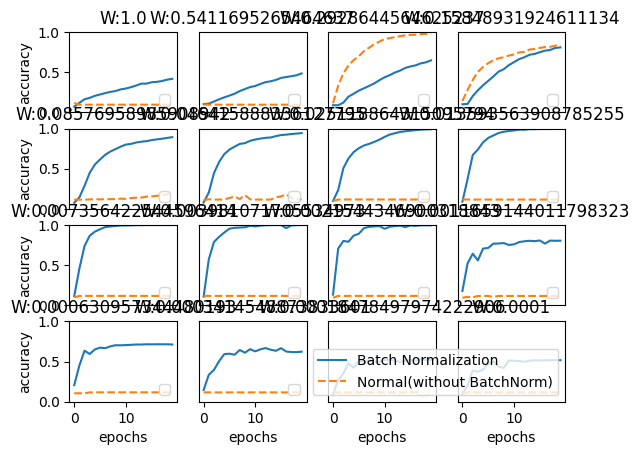

In [14]:
%run batch_norm_test.py

## 6.4 正則化
### 6.4.1 過学習

epoch:0, train acc:0.16, test acc:0.1457
epoch:1, train acc:0.18, test acc:0.1584
epoch:2, train acc:0.19, test acc:0.1676
epoch:3, train acc:0.21333333333333335, test acc:0.1799
epoch:4, train acc:0.22666666666666666, test acc:0.1929
epoch:5, train acc:0.2866666666666667, test acc:0.2077
epoch:6, train acc:0.31333333333333335, test acc:0.2291
epoch:7, train acc:0.35, test acc:0.2551
epoch:8, train acc:0.38666666666666666, test acc:0.275
epoch:9, train acc:0.41333333333333333, test acc:0.3011
epoch:10, train acc:0.45, test acc:0.3242
epoch:11, train acc:0.5066666666666667, test acc:0.3586
epoch:12, train acc:0.5333333333333333, test acc:0.3917
epoch:13, train acc:0.5533333333333333, test acc:0.4159
epoch:14, train acc:0.55, test acc:0.4265
epoch:15, train acc:0.57, test acc:0.4494
epoch:16, train acc:0.5766666666666667, test acc:0.461
epoch:17, train acc:0.5833333333333334, test acc:0.473
epoch:18, train acc:0.5966666666666667, test acc:0.4883
epoch:19, train acc:0.6133333333333333, te

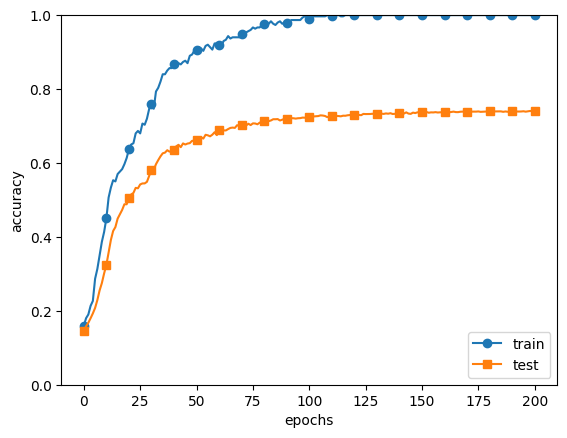

In [16]:
%run overfit_weight_decay.py

### 6.4.2 Weight decay

epoch:0, train acc:0.10666666666666667, test acc:0.1014
epoch:1, train acc:0.13, test acc:0.1202
epoch:2, train acc:0.16333333333333333, test acc:0.1373
epoch:3, train acc:0.22333333333333333, test acc:0.1673
epoch:4, train acc:0.27, test acc:0.1975
epoch:5, train acc:0.2866666666666667, test acc:0.2181
epoch:6, train acc:0.3233333333333333, test acc:0.2234
epoch:7, train acc:0.36333333333333334, test acc:0.2397
epoch:8, train acc:0.39, test acc:0.2586
epoch:9, train acc:0.37666666666666665, test acc:0.272
epoch:10, train acc:0.4066666666666667, test acc:0.2863
epoch:11, train acc:0.43666666666666665, test acc:0.3056
epoch:12, train acc:0.4533333333333333, test acc:0.3141
epoch:13, train acc:0.4633333333333333, test acc:0.3302
epoch:14, train acc:0.46, test acc:0.3349
epoch:15, train acc:0.49, test acc:0.3477
epoch:16, train acc:0.49666666666666665, test acc:0.3554
epoch:17, train acc:0.51, test acc:0.3644
epoch:18, train acc:0.5233333333333333, test acc:0.369
epoch:19, train acc:0.526

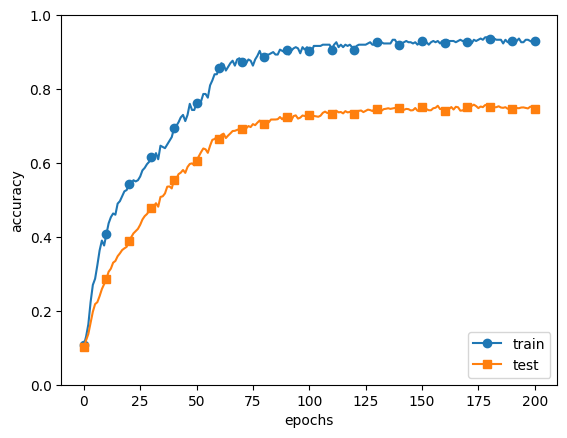

In [17]:
%run overfit_weight_decay.py

### 6.4.3 Dropout

train loss:2.326294529508133
=== epoch:1, train acc:0.09, test acc:0.0816 ===
train loss:2.317235995791737
train loss:2.322341875015111
train loss:2.3061355409304394
=== epoch:2, train acc:0.09333333333333334, test acc:0.0827 ===
train loss:2.3057311851831335
train loss:2.318593137981532
train loss:2.32944036017432
=== epoch:3, train acc:0.09, test acc:0.0832 ===
train loss:2.3077203011931364
train loss:2.31375023219491
train loss:2.31154657398018
=== epoch:4, train acc:0.08666666666666667, test acc:0.083 ===
train loss:2.2903835567036994
train loss:2.3019692034221633
train loss:2.3116296221336965
=== epoch:5, train acc:0.09, test acc:0.0809 ===
train loss:2.3106749751595053
train loss:2.304926316672628
train loss:2.2784157833653826
=== epoch:6, train acc:0.09666666666666666, test acc:0.0804 ===
train loss:2.3021585662146156
train loss:2.307161911344724
train loss:2.280841857508259
=== epoch:7, train acc:0.10333333333333333, test acc:0.0798 ===
train loss:2.3000666070089015
train loss:

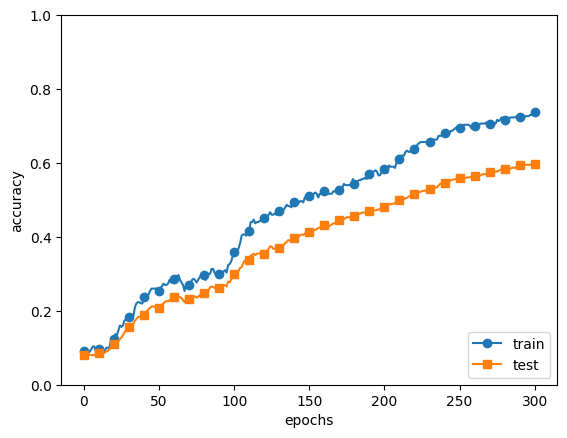

In [18]:
%run overfit_dropout.py

## 6.5 ハイパーパラメータの検証
### 6.5.1 検証データ

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 訓練データをシャッフル
x_train, t_train = shuffle_dataset(x_train, t_train)

# 検証データの分割
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

NameError: name 'validation_num' is not defined